In [1]:
#step1
!pip install gdelt
!pip install newspaper3k
!pip install lxml[html_clean]
!pip install nltk
!pip install spacy
!pip install matplotlib
!pip install wordcloud



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [37]:
#step 2:Fetch Event Data from GDELT
import gdelt
import pandas as pd
from datetime import datetime

# Initialize GDELT client
gd = gdelt.gdelt(version=2)

# Define date range and country code of interest
start_date = datetime(2023, 9, 1)
end_date = datetime(2023, 9, 10)
country_code = 'US'

# Create a list to store dataframes
events_list = []

# Define the interval for fetching data (e.g., every 5 days)
date_range = pd.date_range(start_date, end_date, freq='5D')

for date in date_range:
    # Format date as string for GDELT query
    date_str = date.strftime('%Y%m%d')
    
    # Fetch data from GDELT for the given date
    results = gd.Search(date_str, table='events')
    
    # Convert results to DataFrame and append to list
    df = pd.DataFrame(results)
    events_list.append(df)

# Combine all dataframes into a single dataframe
events_df = pd.concat(events_list, ignore_index=True)

# Optionally, filter the dataframe by country code if needed
# events_df = events_df[events_df['COUNTRYCODE'] == country_code]

# Display the first few rows of the dataframe
print(events_df.head())


   GLOBALEVENTID   SQLDATE  MonthYear  Year  FractionDate Actor1Code  \
0     1124358300  20220901     202209  2022     2022.6603        FRA   
1     1124358301  20220901     202209  2022     2022.6603        FRA   
2     1124358302  20220901     202209  2022     2022.6603        GOV   
3     1124358303  20220901     202209  2022     2022.6603        GOV   
4     1124358304  20220901     202209  2022     2022.6603        GOV   

  Actor1Name Actor1CountryCode Actor1KnownGroupCode Actor1EthnicCode  ...  \
0     FRENCH               FRA                  NaN              NaN  ...   
1     FRENCH               FRA                  NaN              NaN  ...   
2  PRESIDENT               NaN                  NaN              NaN  ...   
3  PRESIDENT               NaN                  NaN              NaN  ...   
4  PRESIDENT               NaN                  NaN              NaN  ...   

  ActionGeo_Type                     ActionGeo_FullName ActionGeo_CountryCode  \
0              4       

In [3]:
print(events_df.columns)


Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode',
       'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources',
       'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName',
       'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_ADM2Code',
       'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
       'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode',
       'Actor2Geo_ADM1Code', 'Actor2Geo_ADM2Code

In [4]:
# Print out the first few rows to verify URLs
print(events_df.head())


   GLOBALEVENTID   SQLDATE  MonthYear  Year  FractionDate Actor1Code  \
0     1124358300  20220901     202209  2022     2022.6603        FRA   
1     1124358301  20220901     202209  2022     2022.6603        FRA   
2     1124358302  20220901     202209  2022     2022.6603        GOV   
3     1124358303  20220901     202209  2022     2022.6603        GOV   
4     1124358304  20220901     202209  2022     2022.6603        GOV   

  Actor1Name Actor1CountryCode Actor1KnownGroupCode Actor1EthnicCode  ...  \
0     FRENCH               FRA                  NaN              NaN  ...   
1     FRENCH               FRA                  NaN              NaN  ...   
2  PRESIDENT               NaN                  NaN              NaN  ...   
3  PRESIDENT               NaN                  NaN              NaN  ...   
4  PRESIDENT               NaN                  NaN              NaN  ...   

  ActionGeo_Type                     ActionGeo_FullName ActionGeo_CountryCode  \
0              4       

In [5]:
#step 3:Scrape Article Texts 
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to scrape article text from URL
def scrape_article_text(url):
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Connection': 'keep-alive',
        }
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an error for bad responses
        
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')
        text = ' '.join([p.get_text() for p in paragraphs])
        
        return text
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None

# Initialize lists to store article texts and IDs
article_texts = []
article_ids = []

# Get URLs from the DataFrame
urls = events_df['SOURCEURL'].dropna().unique()  # Remove NaN values and duplicate URLs

# Define the number of articles to scrape (e.g., 10)
num_articles_to_scrape = min(10, len(urls))  # Scrape up to 10 articles or fewer if less are available

# Loop through the URLs and scrape articles
for url in urls[:num_articles_to_scrape]:
    text = scrape_article_text(url)
    if text:
        article_texts.append(text)
        article_ids.append(url)

# Convert lists to DataFrame for easier handling
articles_df = pd.DataFrame({
    'Article_ID': article_ids,
    'Article_Text': article_texts
})

# Display the first few rows of the DataFrame
print(articles_df.head())


Error scraping https://www.yahoo.com/news/macron-looks-frances-africa-policy-231550395.html: 404 Client Error: Not Found for url: https://www.yahoo.com/news/macron-looks-frances-africa-policy-231550395.html
Error scraping https://www.washingtontimes.com/news/2023/sep/1/ron-desantis-wont-meet-with-joe-biden-during-presi/: 403 Client Error: Forbidden for url: https://www.washingtontimes.com/news/2023/sep/1/ron-desantis-wont-meet-with-joe-biden-during-presi/
Error scraping https://whnt.com/news/alabama-news/former-rep-david-coles-plea-deal-includes-restitution-taxpayers-to-cover-special-election/: 403 Client Error: Forbidden for url: https://whnt.com/news/alabama-news/former-rep-david-coles-plea-deal-includes-restitution-taxpayers-to-cover-special-election/
                                          Article_ID  \
0  https://www.ketchikandailynews.com/news/alaska...   
1  https://rapidcityjournal.com/news/local/4-deci...   
2  https://www.jpost.com/international/article-75...   
3  https://

In [6]:
print(events_df.head())
print(events_df.info())


   GLOBALEVENTID   SQLDATE  MonthYear  Year  FractionDate Actor1Code  \
0     1124358300  20220901     202209  2022     2022.6603        FRA   
1     1124358301  20220901     202209  2022     2022.6603        FRA   
2     1124358302  20220901     202209  2022     2022.6603        GOV   
3     1124358303  20220901     202209  2022     2022.6603        GOV   
4     1124358304  20220901     202209  2022     2022.6603        GOV   

  Actor1Name Actor1CountryCode Actor1KnownGroupCode Actor1EthnicCode  ...  \
0     FRENCH               FRA                  NaN              NaN  ...   
1     FRENCH               FRA                  NaN              NaN  ...   
2  PRESIDENT               NaN                  NaN              NaN  ...   
3  PRESIDENT               NaN                  NaN              NaN  ...   
4  PRESIDENT               NaN                  NaN              NaN  ...   

  ActionGeo_Type                     ActionGeo_FullName ActionGeo_CountryCode  \
0              4       

In [9]:
#step 4
#Import Libraries and Download NLTK Resources
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
#Scrape Article Text from a URL
def scrape_article_text(url):
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Connection': 'keep-alive',
        }
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an error for bad responses
        
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')
        text = ' '.join([p.get_text() for p in paragraphs])
        
        return text
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None


In [11]:
#Preprocess the Text
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text_cleaned = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    
    # Tokenize the text
    tokens = word_tokenize(text_cleaned)
    
    # Remove stopwords and lemmatize each word
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 1]
    
    # Join tokens back into a string
    clean_text = ' '.join(clean_tokens)
    
    return clean_text


In [12]:
##Scrape, Preprocess, and Display Text Before and After Cleaning

# Initialize lists to store article texts and IDs
original_texts = []
cleaned_texts = []
article_ids = []

# Assume 'events_df' is the DataFrame with the source URLs
urls = events_df['SOURCEURL'].dropna().unique()  # Remove NaN values and duplicate URLs

# Define the number of articles to scrape (e.g., 10)
num_articles_to_scrape = min(10, len(urls))  # Scrape up to 10 articles or fewer if less are available

# Loop through the URLs and scrape articles
for url in urls[:num_articles_to_scrape]:
    original_text = scrape_article_text(url)
    if original_text:
        cleaned_text = preprocess_text(original_text)  # Preprocess the scraped text
        
        # Append both original and cleaned text to lists
        original_texts.append(original_text)
        cleaned_texts.append(cleaned_text)
        article_ids.append(url)
        
        # Output the text before and after cleaning
        print(f"Original Text (Before Cleaning) from {url[:50]}:\n", original_text[:500], "\n")  # Show only the first 500 chars
        print(f"Cleaned Text (After Cleaning):\n", cleaned_text[:500], "\n")  # Show only the first 500 chars
        print("="*80)  # Separator for better readability


Error scraping https://www.yahoo.com/news/macron-looks-frances-africa-policy-231550395.html: 404 Client Error: Not Found for url: https://www.yahoo.com/news/macron-looks-frances-africa-policy-231550395.html
Error scraping https://www.washingtontimes.com/news/2023/sep/1/ron-desantis-wont-meet-with-joe-biden-during-presi/: 403 Client Error: Forbidden for url: https://www.washingtontimes.com/news/2023/sep/1/ron-desantis-wont-meet-with-joe-biden-during-presi/
Original Text (Before Cleaning) from https://www.ketchikandailynews.com/news/alaska/civ:
  Please log in, or sign up for a new account and purchase a subscription to continue reading.
 Please purchase a subscription to continue reading.
 Your current subscription does not provide access to this content.
 Please call the office: 907-225-3157 Use your Subscriber Number to activate your included online access.       Overcast with rain showers at times. High 57F. Winds SSE at 5 to 10 mph. Chance of rain 40%..
                             

In [13]:
#Store Original and Cleaned Texts in a DataFrame

# Convert lists to DataFrame for easier handling
articles_df = pd.DataFrame({
    'Article_ID': article_ids,
    'Original_Article_Text': original_texts,
    'Cleaned_Article_Text': cleaned_texts
})

# Display the first few rows of the DataFrame
print(articles_df.head())


                                          Article_ID  \
0  https://www.ketchikandailynews.com/news/alaska...   
1  https://rapidcityjournal.com/news/local/4-deci...   
2  https://www.jpost.com/international/article-75...   
3  https://abc7ny.com/boston-market-workers-inves...   
4  https://journalstar.com/news/state-regional/go...   

                               Original_Article_Text  \
0   Please log in, or sign up for a new account a...   
1  Subscribe to our Daily Headlines newsletter. B...   
2  The New York City Police Department (NYPD) ann...   
3  WATCH LIVE RIDGEWOOD, Queens (WABC) -- Workers...   
4  Stay up-to-date on the latest in local and nat...   

                                Cleaned_Article_Text  
0  please log sign new account purchase subscript...  
1  subscribe daily headline newsletter school boa...  
2  new york city police department nypd announced...  
3  watch live ridgewood queen wabc worker boston ...  
4  stay uptodate latest local national government..

In [21]:
#step 5
!pip install gensim scikit-learn




  Using cached gensim-4.3.3-cp39-cp39-win_amd64.whl.metadata (8.2 kB)
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.0 MB 2.6 MB/s eta 0:00:10
    --------------------------------------- 0.4/24.0 MB 4.7 MB/s eta 0:00:06
   - -------------------------------------- 0.8/24.0 MB 6.0 MB/s eta 0:00:04
   - -------------------------------------- 1.1/24.0 MB 6.9 MB/s eta 0:00:04
   --- ------------------------------------ 2.1/24.0 MB 9.7 MB/s eta 0:00:03
   ---- ----------------------------------- 2.8/24.0 MB 9.8 MB/s eta 0:00:03
   ------ --------------------------------- 3.8/24.0 MB 11.4 MB/s eta 0:00:02
   ------- -------------------------------- 4.2/24.0 MB 12.3 MB/s eta 0:00:02
   -------- ------------------------------- 5.3/24.0 MB 12.9 MB/s eta 0:00:02
   --------- ------------------------------ 5.8/24.0 MB 12.3 MB/s eta 0:00:02
   ----------- ---------------------------- 6.8/24.0 MB 13.1 MB/s eta 0:00:02
   -----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
#Apply Preprocessing to the 'Article_Text' Column

# Ensure 'Cleaned_Article_Text' column is ready
documents = articles_df['Cleaned_Article_Text'].tolist()


In [23]:
#Vectorize the Documents
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the documents
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)


In [24]:
#Fit the LDA Model
import gensim
from gensim import corpora
from gensim.models import LdaModel

# Prepare the data for LDA
texts = [doc.split() for doc in documents]  # Split each document into words
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Fit the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


In [25]:
# Display top words for each topic
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")


Topic 1: 0.014*"lawsuit" + 0.012*"department" + 0.012*"suicide" + 0.010*"family" + 0.010*"died" + 0.010*"behalf" + 0.008*"correction" + 0.008*"alaska" + 0.006*"said" + 0.006*"last"
Topic 2: 0.015*"news" + 0.013*"company" + 0.011*"boston" + 0.009*"said" + 0.009*"late" + 0.009*"market" + 0.008*"day" + 0.008*"worker" + 0.008*"u" + 0.008*"eyewitness"
Topic 3: 0.029*"new" + 0.027*"surveillance" + 0.024*"york" + 0.017*"drone" + 0.015*"technology" + 0.012*"city" + 0.012*"police" + 0.010*"oversight" + 0.010*"ap" + 0.010*"told"
Topic 4: 0.021*"lincoln" + 0.013*"nebraska" + 0.013*"school" + 0.013*"aug" + 0.010*"lancaster" + 0.009*"center" + 0.008*"left" + 0.008*"saturday" + 0.007*"district" + 0.006*"thursday"
Topic 5: 0.001*"new" + 0.001*"surveillance" + 0.001*"york" + 0.001*"lincoln" + 0.001*"technology" + 0.001*"nebraska" + 0.001*"drone" + 0.001*"aug" + 0.001*"city" + 0.001*"lancaster"


In [26]:
# Get topic distributions for each document
doc_topics = [lda_model.get_document_topics(bow) for bow in corpus]

# Convert topic distributions to a DataFrame
topic_distributions = pd.DataFrame(doc_topics)
print(topic_distributions.head())


                 0
0   (0, 0.9968355)
1  (3, 0.99808186)
2  (2, 0.99933547)
3   (1, 0.9970974)
4   (3, 0.9994188)


In [27]:
#step 6
#Get N-Grams from the Cleaned Text

from nltk import ngrams
from collections import Counter

def extract_ngrams(text, n):
    tokens = text.split()  # Tokenize the text
    n_grams = ngrams(tokens, n)  # Generate n-grams
    return [' '.join(gram) for gram in n_grams]

# Get bigrams and trigrams for all documents
bigrams = []
trigrams = []

for doc in documents:
    bigrams.extend(extract_ngrams(doc, 2))
    trigrams.extend(extract_ngrams(doc, 3))


In [28]:
#Sentiment Analysis
!pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   ---------- ----------------------------- 163.8/626.3 kB 2.4 MB/s eta 0:00:01
   ------------------------------ --------- 471.0/626.3 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns sentiment score

# Apply sentiment analysis to each document
sentiments = [get_sentiment(doc) for doc in documents]


In [30]:
# Process the Documents

# Add sentiment to the DataFrame
articles_df['Sentiment'] = sentiments

# Optional: Add n-grams to the DataFrame for easy access
articles_df['Bigrams'] = [extract_ngrams(doc, 2) for doc in documents]
articles_df['Trigrams'] = [extract_ngrams(doc, 3) for doc in documents]


In [31]:
#Display the Most Common N-Grams
def get_most_common_ngrams(ngrams_list, top_n=10):
    ngram_freq = Counter(ngrams_list)
    return ngram_freq.most_common(top_n)

# Get most common bigrams and trigrams
common_bigrams = get_most_common_ngrams(bigrams)
common_trigrams = get_most_common_ngrams(trigrams)

print("Most Common Bigrams:")
for ngram, freq in common_bigrams:
    print(f"{ngram}: {freq}")

print("\nMost Common Trigrams:")
for ngram, freq in common_trigrams:
    print(f"{ngram}: {freq}")


Most Common Bigrams:
new york: 36
told ap: 15
surveillance technology: 15
mayor eric: 14
post act: 14
aug lincoln: 14
last month: 11
lancaster county: 10
lancaster event: 10
event center: 10

Most Common Trigrams:
lancaster event center: 10
push increased drone: 9
increased drone usage: 9
drone usage surveillance: 9
usage surveillance linked: 9
surveillance linked new: 9
linked new york: 9
new york mayor: 9
york mayor eric: 9
mayor eric adams: 9


In [33]:
#step 7
!pip install wordcloud matplotlib



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
# Combine all cleaned texts into one string
all_text = ' '.join(documents)


In [35]:
#Generate a Word Cloud Image

from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


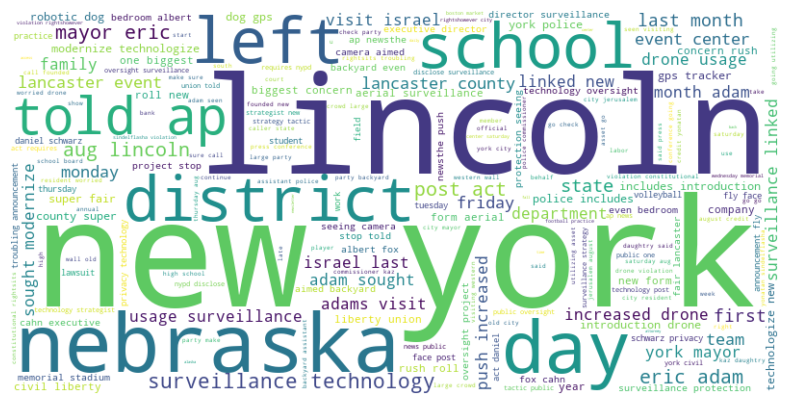

In [36]:
#Display the Word Cloud

import matplotlib.pyplot as plt

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for word cloud
plt.show()
